In [1]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
import os
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy import stats
from scipy.stats import norm
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rc('font',family='Palatino Linotype')

In [2]:
pd.read_excel('./data/test1.xlsx')

,Step,PosArmX(mm),PosArmY(mm),PosArmZ(mm),mkx(mm),mky(mm),mkz(mm),kx(mm),ky(mm),kz(mm),mx(mm),my(mm),mz(mm),get_position_X(mm),get_position_Y(mm),get_position_Z(mm),MK-L,K-L,M-L,G-L
0,1.0,220.00,0.00,340.00,220.000000,0.000000,340.000000,220.00,0.00,340.00,220.000000,0.0000,340.000,220.000000,0.00,340.000000,0.000000,0.000000,0.000000,0.000000
1,2.0,220.02,0.08,339.94,219.812828,-0.059706,339.840392,220.00,0.00,340.00,220.010000,0.0400,339.970,220.000000,0.00,340.000000,0.268997,0.101980,0.050990,0.101980
2,3.0,219.96,0.25,339.79,219.578606,0.022185,339.654830,219.99,0.15,339.87,219.993333,0.1100,339.910,220.020004,0.08,339.940002,0.464362,0.131529,0.187380,0.234523
3,4.0,219.89,0.32,339.71,219.757888,0.190355,339.280032,219.94,0.22,339.79,219.967500,0.1625,339.860,219.960007,0.25,339.790009,0.468117,0.137477,0.230895,0.127289
4,5.0,219.87,0.37,339.66,219.382614,0.130564,339.478597,219.91,0.28,339.73,219.948000,0.2040,339.820,219.889999,0.32,339.709991,0.572522,0.120830,0.243393,0.073478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,497.0,220.09,-10.37,317.74,219.894732,-10.701974,317.718448,219.78,-10.68,317.91,219.472000,-10.9440,318.032,219.750000,-10.69,317.899994,0.385747,0.470213,0.892560,0.493557
497,498.0,220.47,-9.99,317.55,220.324340,-9.998098,317.132309,220.13,-10.35,317.73,219.782000,-10.6480,317.882,220.089996,-10.37,317.739990,0.442435,0.526878,1.008232,0.569999
498,499.0,220.79,-9.61,317.33,220.540058,-9.894161,317.305970,220.46,-9.99,317.53,220.106000,-10.3200,317.720,220.470001,-9.99,317.549988,0.379204,0.541572,1.060215,0.543318
499,500.0,221.23,-9.12,317.02,220.813646,-9.297852,316.616469,220.85,-9.57,317.28,220.466000,-9.9560,317.508,220.789993,-9.61,317.329987,0.606481,0.643817,1.233181,0.727872


In [3]:
dir_list=os.listdir('./data')
data_list=[]
for i in range(len(dir_list)):
    temp=pd.read_excel('./data/'+dir_list[i])
    data_list.append(temp)
print(len(data_list))
data_list[1]

8


,Step,PosArmX(mm),PosArmY(mm),PosArmZ(mm),mkx(mm),mky(mm),mkz(mm),kx(mm),ky(mm),kz(mm),mx(mm),my(mm),mz(mm),get_position_X(mm),get_position_Y(mm),get_position_Z(mm),MK-L,K-L,M-L,G-L
0,1,220.00,0.00,340.00,220.000000,0.000000,340.000000,220.00,0.00,340.00,220.000000,0.000000,340.000000,220.000000,0.00,340.000000,0.000000,0.000000,0.000000,0.000000
1,2,220.05,-0.07,340.14,219.903924,-0.301662,340.093703,220.03,-0.02,340.08,220.025000,-0.035000,340.070000,220.000000,0.00,340.000000,0.277756,0.080623,0.082158,0.164317
2,3,220.11,-0.13,340.15,219.942471,-0.486317,339.817082,220.07,-0.06,340.13,220.053333,-0.066667,340.096667,220.050003,-0.07,340.140015,0.515619,0.083066,0.100333,0.085436
3,4,220.15,-0.17,340.14,219.667624,-0.503298,340.048064,220.11,-0.10,340.15,220.077500,-0.092500,340.107500,220.110001,-0.13,340.149994,0.593487,0.081240,0.110990,0.057444
4,5,220.11,-0.18,340.13,219.743881,-0.399296,339.701301,220.12,-0.14,340.15,220.084000,-0.110000,340.112000,220.149994,-0.17,340.140015,0.604911,0.045826,0.076811,0.042424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,228.54,4.53,327.69,228.349213,4.408212,327.522303,228.60,4.08,327.77,228.644000,3.574000,327.794000,228.610001,4.04,327.790009,0.281699,0.460977,0.967248,0.504977
496,497,228.45,4.93,327.54,228.196703,4.634422,327.392412,228.53,4.52,327.67,228.592000,4.026000,327.736000,228.539993,4.53,327.690002,0.416303,0.437493,0.935840,0.436577
497,498,228.30,5.33,327.31,227.966254,4.844081,326.876071,228.42,4.94,327.50,228.512000,4.474000,327.630000,228.449997,4.93,327.540009,0.731982,0.450111,0.938126,0.485184
498,499,228.13,5.71,327.08,227.902184,5.516272,326.723375,228.28,5.34,327.30,228.406000,4.908000,327.482000,228.300003,5.33,327.309998,0.465416,0.455851,0.938607,0.475605


#### 全体3D图

findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not 

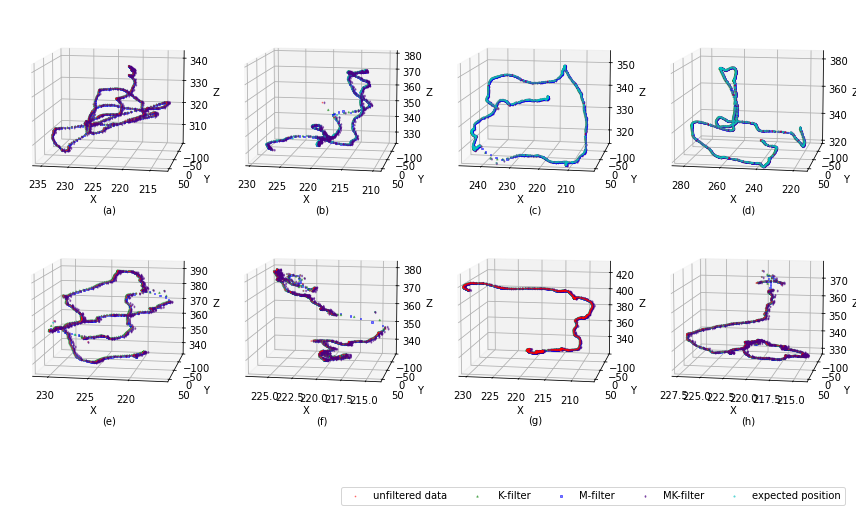

In [11]:
# Define a list of colors for different datasets
# Define a list of colors for different datasets
colors = ['r', 'g', 'b', 'c','indigo']
name_list = ['(a)', '(b)', '(c)', '(d)','(e)', '(f)', '(g)', '(h)']
fig = plt.figure(figsize=(18, 12))
setp = 1
s = 2 # 点大小

for i in range(len(data_list)):
    data = data_list[i]
    ax = fig.add_subplot(2, 4, i + 1, projection='3d')

    # Extract the columns for X, Y, and Z coordinates
    xs = data['PosArmX(mm)'][::setp]
    ys = data['PosArmY(mm)'][::setp]
    zs = data['PosArmZ(mm)'][::setp]

    # Extract additional columns for different datasets
    kx = data['kx(mm)'][::setp]
    ky = data['ky(mm)'][::setp]
    kz = data['kz(mm)'][::setp]
    mx = data['mx(mm)'][::setp]
    my = data['my(mm)'][::setp]
    mz = data['mz(mm)'][::setp]

    # add mkz
    mkx = data['mkx(mm)'][::setp]
    mky = data['mky(mm)'][::setp]
    mkz = data['mkz(mm)'][::setp]

    get_position_X = data['get_position_X(mm)'][::setp]
    get_position_Y = data['get_position_Y(mm)'][::setp]
    get_position_Z = data['get_position_Z(mm)'][::setp]

    # Plot different datasets with different colors and labels
    ax.scatter(xs, ys, zs, c=colors[0], marker='.', s= s, alpha = 0.5, label='PosArm')
    ax.scatter(kx, ky, kz, c=colors[1], marker='^', s= s, alpha = 0.5, label='k')
    ax.scatter(mx, my, mz, c=colors[2], marker='s', s= s, alpha = 0.5, label='m')
    ax.scatter(mkx, mky, mkz, c=colors[4], marker='d', s= s, alpha = 0.5, label='mk')
    ax.scatter(get_position_X, get_position_Y, get_position_Z, c=colors[3], marker='*', s= s, alpha = 0.5, label='get_position')

    ax.set_ylim(-100,60)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'{name_list[i]}', size=10, y=-0.05, fontdict={'fontsize': 5})

    ax.view_init(elev=10, azim=100)

# Create a common legend subplot
# fig.legend(bbox_to_anchor=(0.6,0.165), labels=['expected position', 'K-filter', 'M-filter', 'unfiltered data'], ncol=4)
fig.legend(bbox_to_anchor=(0.7,0.165), labels=['unfiltered data', ' K-filter', 'M-filter', 'MK-filter','expected position'], ncol=5)


plt.subplots_adjust(left=0.15, bottom=0.15, right=0.8, top=0.8, wspace=0.05, hspace=-0.4)
plt.savefig('output3D.png', dpi = 1200)
plt.show()

### 3D 两部分

findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not 

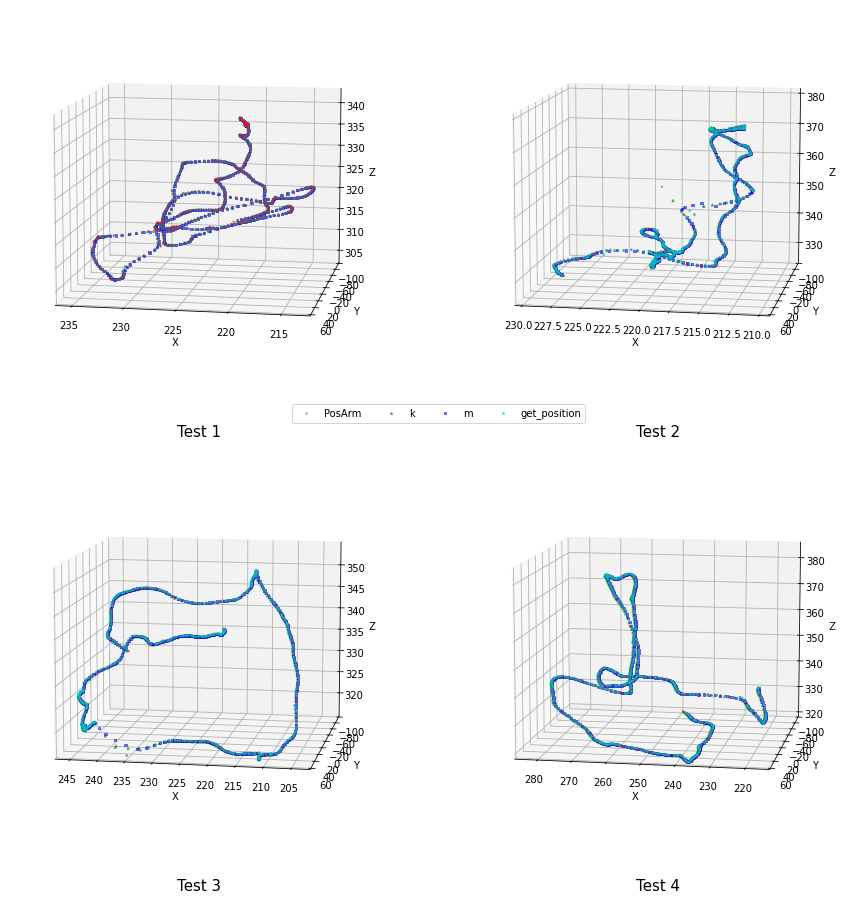

findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not 

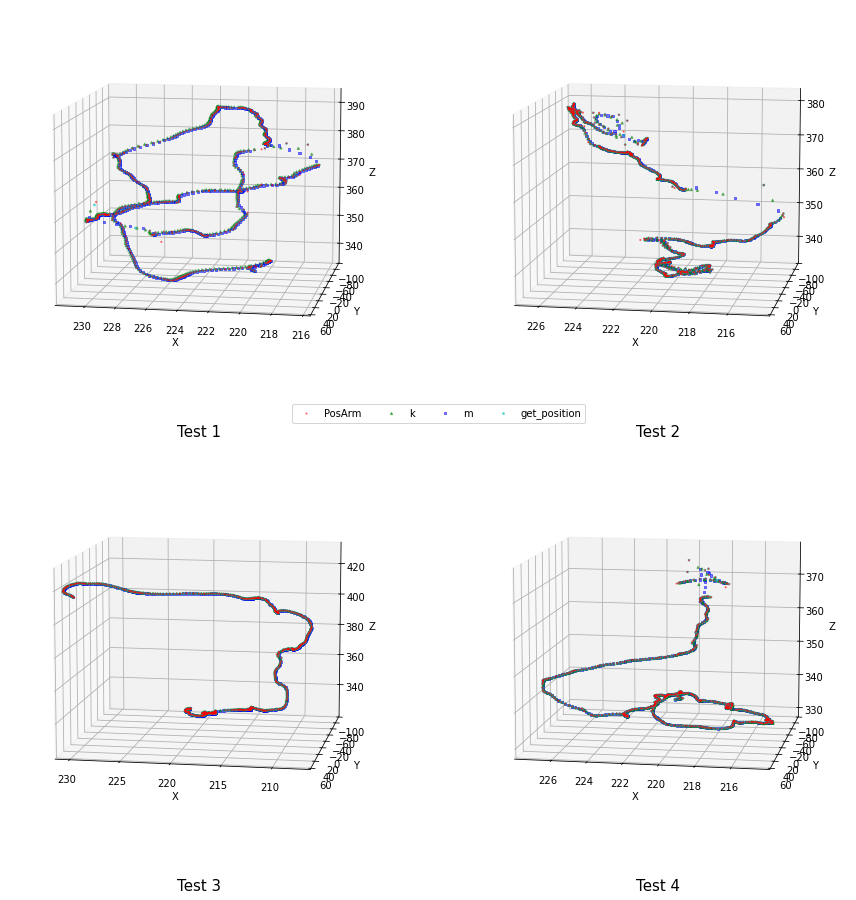

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define a list of colors for different datasets
colors = ['r', 'g', 'b', 'c']

# Split data_list into two parts (assuming data_list has an even length)
data_list_part1 = data_list[:len(data_list) // 2]
data_list_part2 = data_list[len(data_list) // 2:]

# Create the first 2x2 subplot
fig1 = plt.figure(figsize=(18, 12))
setp = 1
s = 5  # Point size

for i in range(len(data_list_part1)):
    data = data_list_part1[i]
    ax = fig1.add_subplot(2, 2, i + 1, projection='3d')

    # Extract the columns for X, Y, and Z coordinates
    xs = data['PosArmX(mm)'][::setp]
    ys = data['PosArmY(mm)'][::setp]
    zs = data['PosArmZ(mm)'][::setp]

    # Extract additional columns for different datasets
    kx = data['kx(mm)'][::setp]
    ky = data['ky(mm)'][::setp]
    kz = data['kz(mm)'][::setp]
    mx = data['mx(mm)'][::setp]
    my = data['my(mm)'][::setp]
    mz = data['mz(mm)'][::setp]
    get_position_X = data['get_position_X(mm)'][::setp]
    get_position_Y = data['get_position_Y(mm)'][::setp]
    get_position_Z = data['get_position_Z(mm)'][::setp]

    # Plot different datasets with different colors and labels
    ax.scatter(xs, ys, zs, c=colors[0], marker='.', s= s, alpha = 0.5, label='PosArm')
    ax.scatter(kx, ky, kz, c=colors[1], marker='^', s= s, alpha = 0.5, label='k')
    ax.scatter(mx, my, mz, c=colors[2], marker='s', s= s, alpha = 0.5, label='m')
    ax.scatter(get_position_X, get_position_Y, get_position_Z, c=colors[3], marker='*', s= s, alpha = 0.5, label='get_position')

    ax.set_ylim(-100, 60)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Test {i + 1}', size=15, y=-0.15, fontdict={'fontsize': 5})

    ax.view_init(elev=10, azim=100)

# Create a common legend subplot for the first 2x2 grid (if needed)
fig1.legend(bbox_to_anchor=(0.6, 0.13), labels=['PosArm', 'k', 'm', 'get_position'], ncol=4)

plt.subplots_adjust(left=0.15, bottom=-0.6, right=0.8, top=0.8, wspace=0.2, hspace=-0.4)

# Save or display the first 2x2 subplot
plt.savefig('output3D_part1.png', dpi=1200)
plt.show()

# Create the second 2x2 subplot
fig2 = plt.figure(figsize=(18, 12))

for i in range(len(data_list_part2)):
    data = data_list_part2[i]
    ax = fig2.add_subplot(2, 2, i + 1, projection='3d')

    # Extract the columns for X, Y, and Z coordinates
    xs = data['PosArmX(mm)'][::setp]
    ys = data['PosArmY(mm)'][::setp]
    zs = data['PosArmZ(mm)'][::setp]

    # Extract additional columns for different datasets
    kx = data['kx(mm)'][::setp]
    ky = data['ky(mm)'][::setp]
    kz = data['kz(mm)'][::setp]
    mx = data['mx(mm)'][::setp]
    my = data['my(mm)'][::setp]
    mz = data['mz(mm)'][::setp]
    get_position_X = data['get_position_X(mm)'][::setp]
    get_position_Y = data['get_position_Y(mm)'][::setp]
    get_position_Z = data['get_position_Z(mm)'][::setp]

    # Plot different datasets with different colors and labels
    ax.scatter(xs, ys, zs, c=colors[0], marker='.', s= s, alpha = 0.5, label='PosArm')
    ax.scatter(kx, ky, kz, c=colors[1], marker='^', s= s, alpha = 0.5, label='k')
    ax.scatter(mx, my, mz, c=colors[2], marker='s', s= s, alpha = 0.5, label='m')
    ax.scatter(get_position_X, get_position_Y, get_position_Z, c=colors[3], marker='*', s= s, alpha = 0.5, label='get_position')

    ax.set_ylim(-100, 60)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Test {i + 1}', size=15, y=-0.15, fontdict={'fontsize': 5})

    ax.view_init(elev=10, azim=100)

# Create a common legend subplot for the second 2x2 grid (if needed)
fig2.legend(bbox_to_anchor=(0.6, 0.13), labels=['PosArm', 'k', 'm', 'get_position'], ncol=4)

plt.subplots_adjust(left=0.15, bottom=-0.6, right=0.8, top=0.8, wspace=0.2, hspace=-0.4)

# Save or display the second 2x2 subplot
plt.savefig('output3D_part2.png', dpi=1200)
plt.show()

#### 单个3D图

findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not 

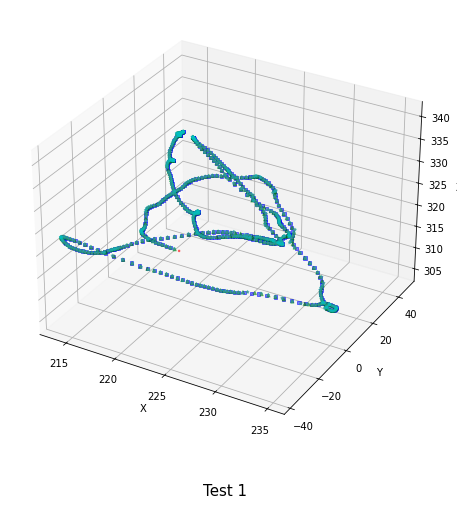

In [6]:
colors = ['r', 'g', 'b', 'c']

fig = plt.figure(figsize=(12, 8))

data = data_list[0]
ax = fig.add_subplot(1, 1, 1, projection='3d')
setp = 1

# Define the size 's' for scatter points and transparency 'alpha'
s = 10  # Adjust the size as needed
alpha = 0.5  # Adjust the transparency as needed

# Extract the columns for X, Y, and Z coordinates
xs = data['PosArmX(mm)'][::setp]
ys = data['PosArmY(mm)'][::setp]
zs = data['PosArmZ(mm)'][::setp]

# Extract additional columns for different datasets
kx = data['kx(mm)'][::setp]
ky = data['ky(mm)'][::setp]
kz = data['kz(mm)'][::setp]
mx = data['mx(mm)'][::setp]
my = data['my(mm)'][::setp]
mz = data['mz(mm)'][::setp]
get_position_X = data['get_position_X(mm)'][::setp]
get_position_Y = data['get_position_Y(mm)'][::setp]
get_position_Z = data['get_position_Z(mm)'][::setp]

# Plot different datasets with different colors and labels
ax.scatter(xs, ys, zs, c=colors[0], marker='.', s=s, alpha=alpha, label='PosArm')
ax.scatter(kx, ky, kz, c=colors[1], marker='^', s=s, alpha=alpha, label='k')
ax.scatter(mx, my, mz, c=colors[2], marker='s', s=s, alpha=alpha, label='m')
ax.scatter(get_position_X, get_position_Y, get_position_Z, c=colors[3], marker='*', s=s, alpha=alpha, label='get_position')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Test 1', size=15, y=-0.15, fontdict={'fontsize': 5})

plt.savefig('single.png', dpi = 600)
plt.show()

#### 单个局部3D图

findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not 

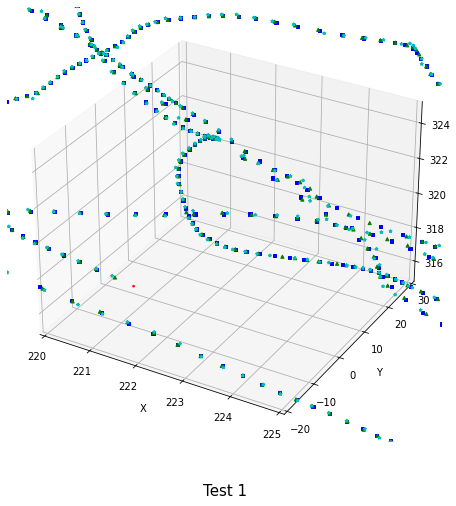

In [7]:
colors = ['r', 'g', 'b', 'c']

fig = plt.figure(figsize=(12, 8))

data = data_list[0]
ax = fig.add_subplot(1, 1, 1, projection='3d')
setp = 1

# Define the size 's' for scatter points and transparency 'alpha'
s = 10  # Adjust the size as needed
alpha = 1  # Adjust the transparency as needed

# Extract the columns for X, Y, and Z coordinates
xs = data['PosArmX(mm)'][::setp]
ys = data['PosArmY(mm)'][::setp]
zs = data['PosArmZ(mm)'][::setp]

# Extract additional columns for different datasets
kx = data['kx(mm)'][::setp]
ky = data['ky(mm)'][::setp]
kz = data['kz(mm)'][::setp]
mx = data['mx(mm)'][::setp]
my = data['my(mm)'][::setp]
mz = data['mz(mm)'][::setp]
get_position_X = data['get_position_X(mm)'][::setp]
get_position_Y = data['get_position_Y(mm)'][::setp]
get_position_Z = data['get_position_Z(mm)'][::setp]

# Plot different datasets with different colors and labels
ax.scatter(xs, ys, zs, c=colors[0], marker='.', s=s, alpha=alpha, label='PosArm')
ax.scatter(kx, ky, kz, c=colors[1], marker='^', s=s, alpha=alpha, label='k')
ax.scatter(mx, my, mz, c=colors[2], marker='s', s=s, alpha=alpha, label='m')
ax.scatter(get_position_X, get_position_Y, get_position_Z, c=colors[3], marker='*', s=s, alpha=alpha, label='get_position')

# Define the limits for the x, y, and z axes to zoom in on a specific area
ax.set_xlim(220, 225)  # Set the x-axis limits
ax.set_ylim(-20, 30)  # Set the y-axis limits
ax.set_zlim(315, 325)  # Set the z-axis limits


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Test 1', size=15, y=-0.15, fontdict={'fontsize': 5})

plt.show()

In [8]:
data

,Step,PosArmX(mm),PosArmY(mm),PosArmZ(mm),mkx(mm),mky(mm),mkz(mm),kx(mm),ky(mm),kz(mm),mx(mm),my(mm),mz(mm),get_position_X(mm),get_position_Y(mm),get_position_Z(mm),MK-L,K-L,M-L,G-L
0,1.0,220.00,0.00,340.00,220.000000,0.000000,340.000000,220.00,0.00,340.00,220.000000,0.0000,340.000,220.000000,0.00,340.000000,0.000000,0.000000,0.000000,0.000000
1,2.0,220.02,0.08,339.94,219.812828,-0.059706,339.840392,220.00,0.00,340.00,220.010000,0.0400,339.970,220.000000,0.00,340.000000,0.268997,0.101980,0.050990,0.101980
2,3.0,219.96,0.25,339.79,219.578606,0.022185,339.654830,219.99,0.15,339.87,219.993333,0.1100,339.910,220.020004,0.08,339.940002,0.464362,0.131529,0.187380,0.234523
3,4.0,219.89,0.32,339.71,219.757888,0.190355,339.280032,219.94,0.22,339.79,219.967500,0.1625,339.860,219.960007,0.25,339.790009,0.468117,0.137477,0.230895,0.127289
4,5.0,219.87,0.37,339.66,219.382614,0.130564,339.478597,219.91,0.28,339.73,219.948000,0.2040,339.820,219.889999,0.32,339.709991,0.572522,0.120830,0.243393,0.073478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,497.0,220.09,-10.37,317.74,219.894732,-10.701974,317.718448,219.78,-10.68,317.91,219.472000,-10.9440,318.032,219.750000,-10.69,317.899994,0.385747,0.470213,0.892560,0.493557
497,498.0,220.47,-9.99,317.55,220.324340,-9.998098,317.132309,220.13,-10.35,317.73,219.782000,-10.6480,317.882,220.089996,-10.37,317.739990,0.442435,0.526878,1.008232,0.569999
498,499.0,220.79,-9.61,317.33,220.540058,-9.894161,317.305970,220.46,-9.99,317.53,220.106000,-10.3200,317.720,220.470001,-9.99,317.549988,0.379204,0.541572,1.060215,0.543318
499,500.0,221.23,-9.12,317.02,220.813646,-9.297852,316.616469,220.85,-9.57,317.28,220.466000,-9.9560,317.508,220.789993,-9.61,317.329987,0.606481,0.643817,1.233181,0.727872


findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not 

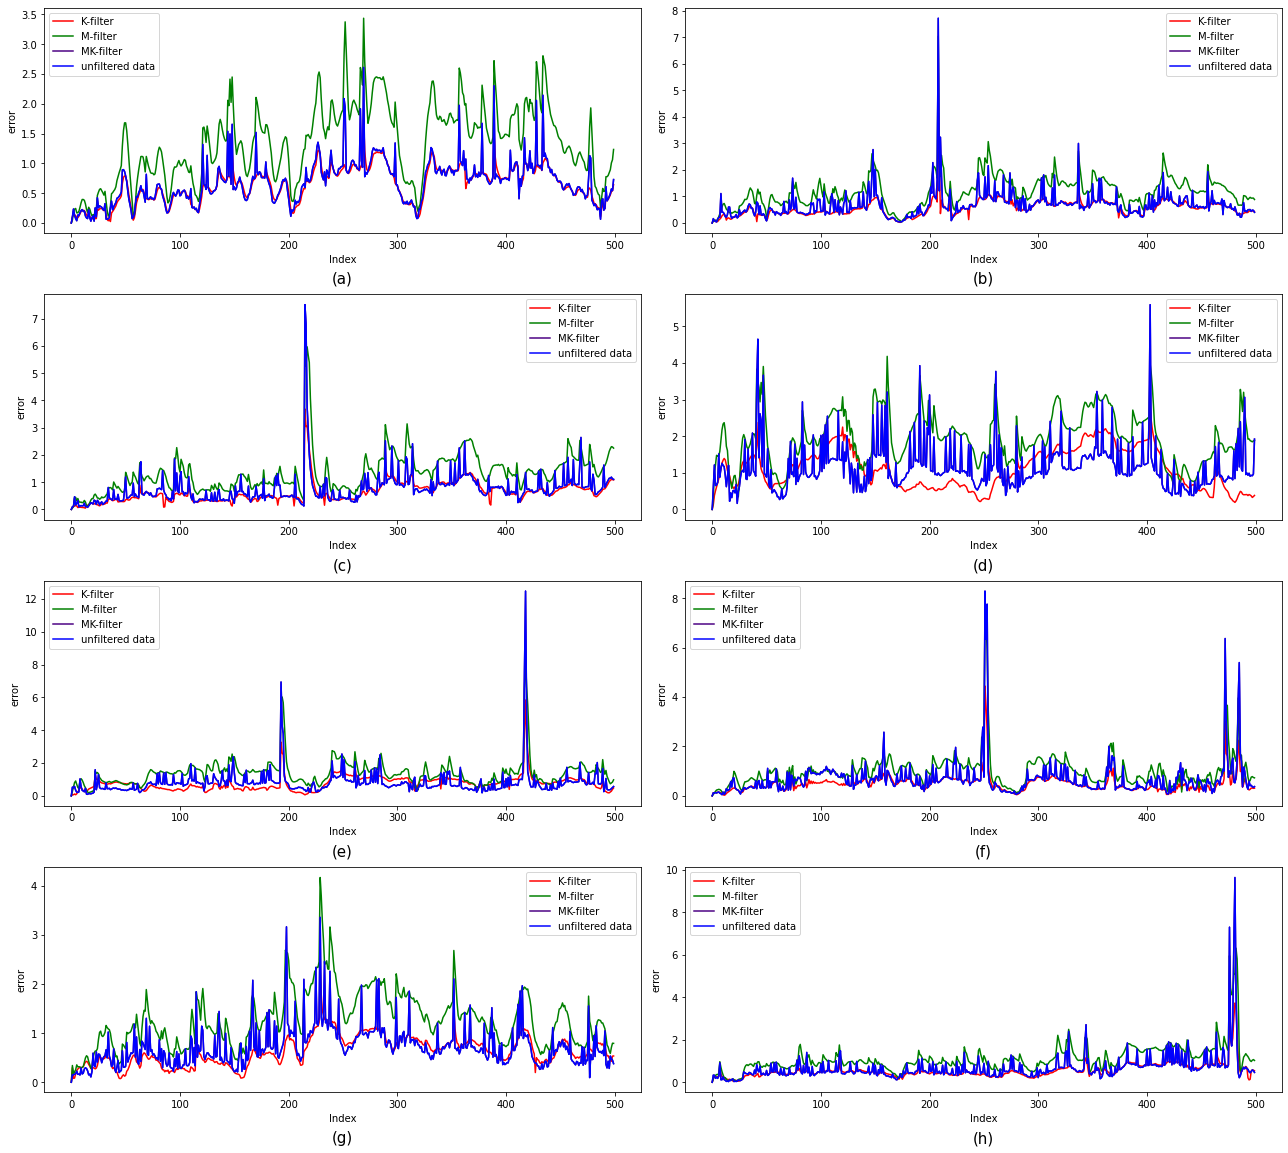

In [9]:
# Define a list of colors for different datasets
colors = ['r', 'g', 'b', 'c','indigo']

fig, axes = plt.subplots(4, 2, figsize=(18, 16))

for i in range(len(data_list)):
    data = data_list[i]
    ax = axes[i // 2, i % 2]  # Subplot selection based on row and column

    # Extract the columns for K-L, M-L, and G-L
    kl = data['K-L'][::setp]
    ml = data['M-L'][::setp]
    gl = data['G-L'][::setp]
    mkl = data['MK-L'][::setp]
    
    # Plot K-L, M-L, and G-L as line plots
    ax.plot(kl, label='K-filter', color=colors[0])
    ax.plot(ml, label='M-filter', color=colors[1])
    ax.plot(gl, label='MK-filter', color=colors[4])
    ax.plot(gl, label='unfiltered data', color=colors[2])


    ax.set_xlabel('Index')
    ax.set_ylabel('error')
    
    # Move the title below the x-axis
    ax.set_title(f'{name_list[i]}', size=15, y = -0.25)
    
    ax.legend()

plt.tight_layout(h_pad=1.5)
plt.savefig('output2D.png', dpi = 1200)
plt.show()


In [13]:
data

,Step,PosArmX(mm),PosArmY(mm),PosArmZ(mm),mkx(mm),mky(mm),mkz(mm),kx(mm),ky(mm),kz(mm),mx(mm),my(mm),mz(mm),get_position_X(mm),get_position_Y(mm),get_position_Z(mm),MK-L,K-L,M-L,G-L
0,1,220.00,0.00,340.00,220.000000,0.000000,340.000000,220.00,0.00,340.00,220.000000,0.000000,340.000000,220.000000,0.000000,340.000000,0.000000,0.000000,0.000000,0.000000
1,2,219.76,-0.15,340.18,219.616414,-0.220979,340.033367,219.86,-0.05,340.06,219.880000,-0.075000,340.090000,220.000000,0.000000,340.000000,0.217155,0.185472,0.167705,0.335410
2,3,219.54,-0.29,340.37,219.427776,-0.486880,340.119658,219.68,-0.14,340.18,219.766667,-0.146667,340.183333,219.759995,-0.150000,340.179993,0.337679,0.279643,0.326752,0.322646
3,4,219.61,-0.31,340.54,219.186207,-0.755297,340.247081,219.62,-0.20,340.33,219.727500,-0.187500,340.272500,219.539993,-0.290000,340.369995,0.680949,0.237276,0.316810,0.184940
4,5,219.79,-0.32,340.70,219.645223,-0.632072,340.358278,219.69,-0.23,340.49,219.740000,-0.214000,340.358000,219.610001,-0.310000,340.540009,0.484895,0.249399,0.361525,0.241033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,220.32,-65.83,369.38,220.312401,-66.290477,369.341307,220.22,-65.80,369.29,219.770000,-65.098000,369.822000,220.100006,-65.470001,369.529999,0.462162,0.137840,1.016704,0.447768
496,497,220.45,-66.25,369.13,220.384029,-66.734278,368.777737,220.22,-65.80,369.29,220.038000,-65.494000,369.590000,220.320007,-65.830002,369.380005,0.602467,0.530094,0.976156,0.505766
497,498,220.68,-66.73,368.90,220.213950,-66.826630,368.607964,220.43,-66.24,369.06,220.280000,-65.888000,369.354000,220.449997,-66.250000,369.130005,0.558413,0.572887,1.036861,0.579831
498,499,220.77,-67.21,368.66,220.473466,-67.249605,368.566632,220.58,-66.70,368.83,220.464000,-66.298000,369.120000,220.679993,-66.730003,368.899994,0.313399,0.570175,1.066293,0.544147


### 2D - 2 * 2 

findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.


findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not 

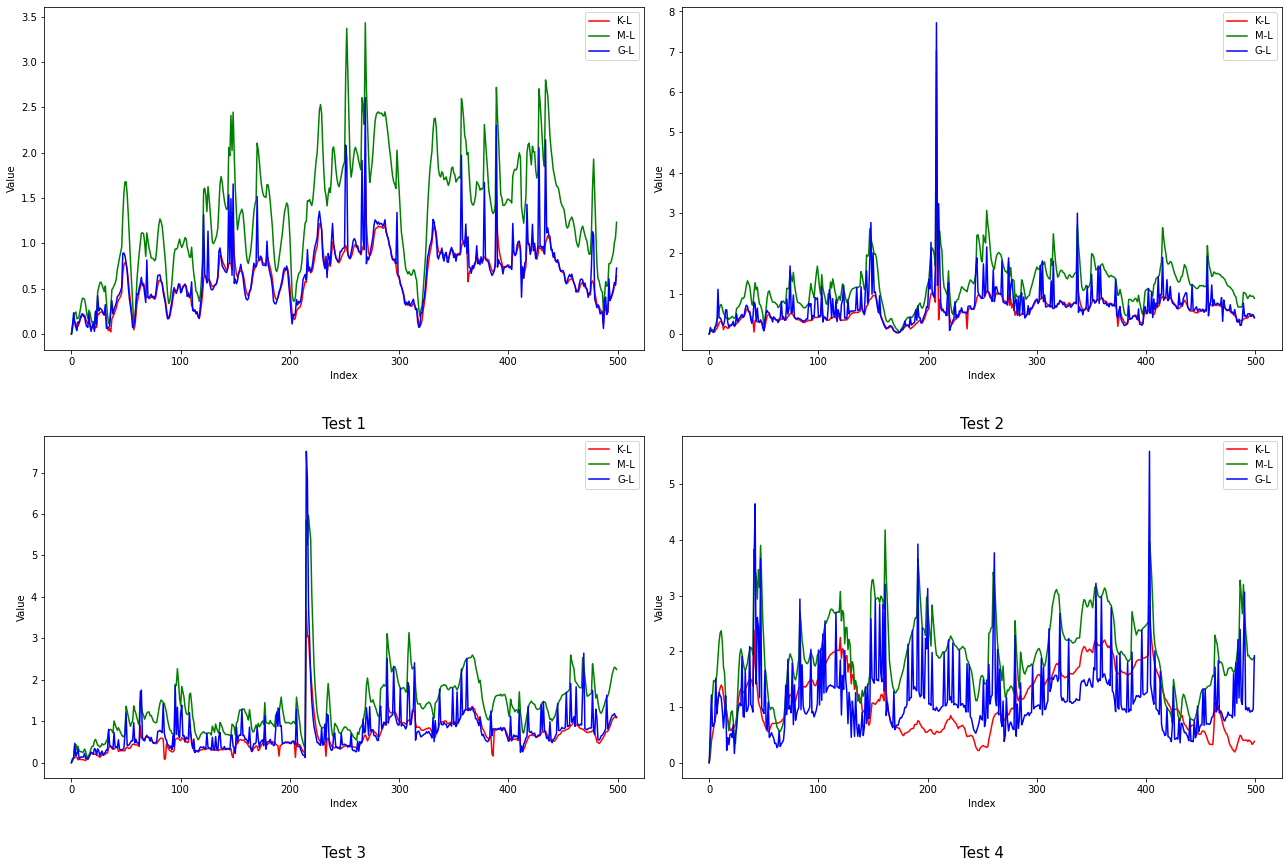

findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not 

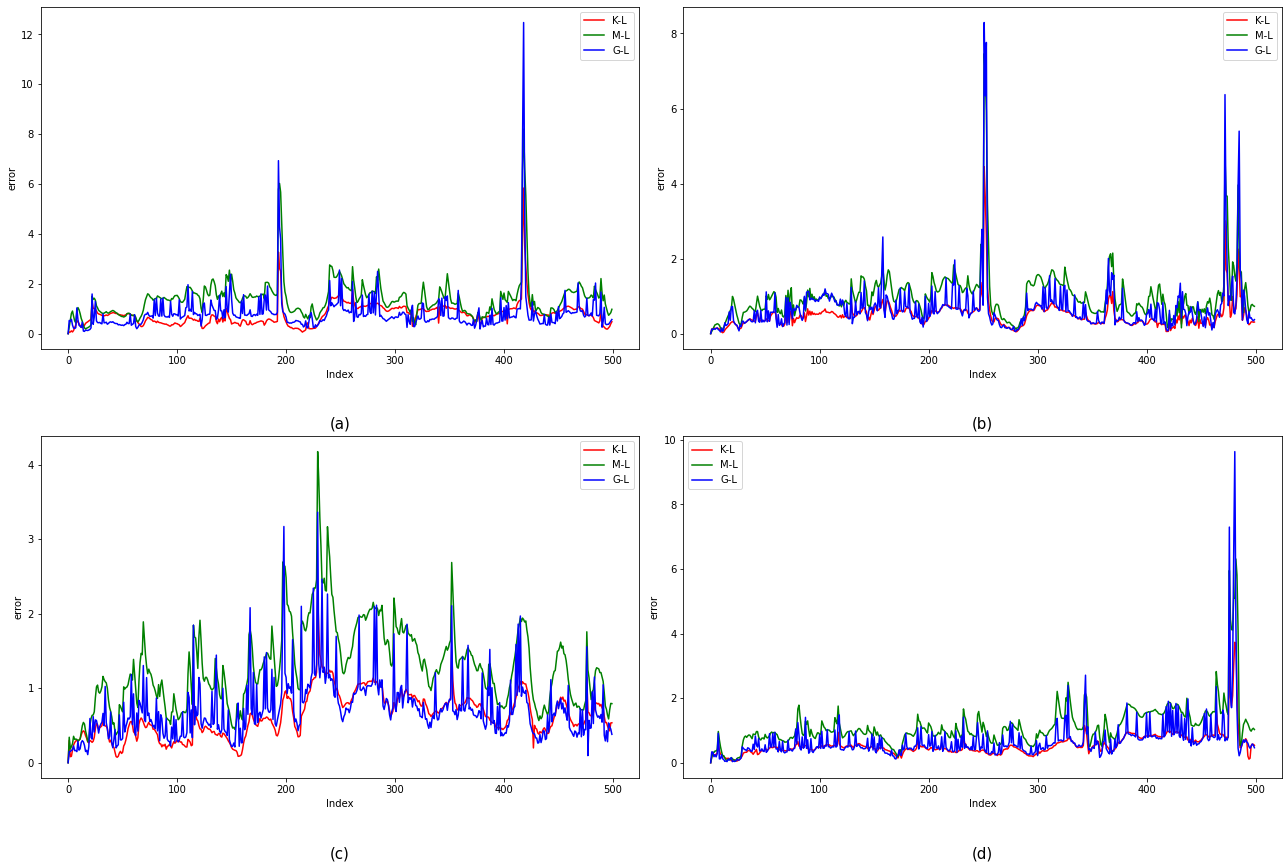

In [10]:
import matplotlib.pyplot as plt

# Define a list of colors for different datasets
colors = ['r', 'g', 'b', 'c']

# Split data_list into two parts (assuming data_list has an even length)
data_list_part1 = data_list[:len(data_list) // 2]
data_list_part2 = data_list[len(data_list) // 2:]

# Create the first 2x2 subplot
fig1, axes1 = plt.subplots(2, 2, figsize=(18, 12))
setp = 1

for i in range(len(data_list_part1)):
    data = data_list_part1[i]
    ax = axes1[i // 2, i % 2]  # Subplot selection based on row and column

    # Extract the columns for K-L, M-L, and G-L
    kl = data['K-L'][::setp]
    ml = data['M-L'][::setp]
    gl = data['G-L'][::setp]

    # Plot K-L, M-L, and G-L as line plots
    ax.plot(kl, label='K-L', color=colors[0])
    ax.plot(ml, label='M-L', color=colors[1])
    ax.plot(gl, label='G-L', color=colors[2])

    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    
    # Move the title below the x-axis
    ax.set_title(f'Test {i + 1}', size=15, y=-0.25)
    
    ax.legend()

plt.tight_layout(h_pad=1.5)
plt.savefig('output2D_part1.png', dpi=1200)
plt.show()

# Create the second 2x2 subplot
fig2, axes2 = plt.subplots(2, 2, figsize=(18, 12))

for i in range(len(data_list_part2)):
    data = data_list_part2[i]
    ax = axes2[i // 2, i % 2]  # Subplot selection based on row and column

    # Extract the columns for K-L, M-L, and G-L
    kl = data['K-L'][::setp]
    ml = data['M-L'][::setp]
    gl = data['G-L'][::setp]

    # Plot K-L, M-L, and G-L as line plots
    ax.plot(kl, label='K-L', color=colors[0])
    ax.plot(ml, label='M-L', color=colors[1])
    ax.plot(gl, label='G-L', color=colors[2])

    ax.set_xlabel('Index')
    ax.set_ylabel('error')
    
    # Move the title below the x-axis
    ax.set_title(f'{name_list[i]}', size=15, y=-0.25)
    
    ax.legend()

plt.tight_layout(h_pad=1.5)
plt.savefig('output2D_part2.png', dpi=1200)
plt.show()
